In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

In [29]:
def get_stock_data(tickers, interval='1d', period='1y'):
    """
    used for fetching historical stock data.
        ticker: name of the fund
        interval: time interval for fetching data ('1d', '1h', '1m', etc.)
        period: period to fetch data for ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max')
    """
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        data[ticker] = stock.history(interval=interval, period=period)
    return data

In [30]:
def find_extrema(data, column='Close', order=5):
    """
    Find local and global extrema of stock prices.
    """
    prices = data[column]
    local_maxima = argrelextrema(prices.values, np.greater, order=order)[0]
    local_minima = argrelextrema(prices.values, np.less, order=order)[0]

    global_max = prices.idxmax()
    global_min = prices.idxmin()
    
    return {
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'count_maxima': len(local_maxima), # to analyze the number of maxima
        'count_minima': len(local_minima), # to analyze the number of minima
        'global_max': (global_max, prices[global_max]),
        'global_min': (global_min, prices[global_min]),
    }

In [31]:
def plot_stock_data(data, extrema, ticker, column='Close'):

    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label=f'{ticker} Close Price', color='xkcd:lavender')

    # map extrema indices to actual dates
    dates = data.index
    local_max_dates = dates[extrema['local_maxima']]
    local_min_dates = dates[extrema['local_minima']]

    global_max, max_value = extrema['global_max']
    global_min, min_value = extrema['global_min']
    
    # Plot local maxima and minima
    plt.scatter(local_max_dates, data[column].iloc[extrema['local_maxima']],
                color='xkcd:magenta', label='Local Maxima', marker='^', s=100)
    plt.scatter(local_min_dates, data[column].iloc[extrema['local_minima']],
                color='purple', label='Local Minima', marker='v', s=100)
    plt.scatter(global_max, max_value,
                color='orchid', label='Global Max', s=200)
    plt.scatter(global_min, min_value,
                color='indigo', label='Global Min', s=200)
    plt.text(global_max, max_value, f'  {max_value:.2f}',
                color='orchid')
    plt.text(global_min, min_value, f'  {min_value:.2f}',
                color='indigo', fontsize=10)

    plt.title(f'{ticker} Stock Price with Global and Local Extrema')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [36]:
def analyze_stocks(tickers, interval='1d', period='1y', order=5):
    """
    Analyze multiple stocks for local minima and maxima.

    """
    # fetching the stock data of multiple stocks
    stock_data = get_stock_data(tickers, interval, period)
    
    # analyze each stock
    results = {}
    for ticker, data in stock_data.items():
        extrema = find_extrema(data, order=order)
        extrema['overall_score'] = extrema['count_maxima'] + extrema['count_minima']
        results[ticker] = extrema
        print(f"\n{ticker}:")
        print(f"Local Maxima Count: {extrema['count_maxima']}")
        print(f"Local Minima Count: {extrema['count_minima']}")
        
        plot_stock_data(data, extrema, ticker)
    
    # comparison of local extrema
    comparison_df = pd.DataFrame.from_dict(
        {ticker: {'Local Maxima': results[ticker]['count_maxima'],
                  'Local Minima': results[ticker]['count_minima'],
                  'Overall Score': results[ticker]['overall_score']}
         for ticker in tickers},
        orient='index'
    )
    print("\nComparison of Local Extrema and Overall Scores:")
    print(comparison_df)

    # sort the dataframe by Overall Score in descending order
    comparison_df = comparison_df.sort_values(by='Overall Score', ascending=False)
    
    # bar chart for aesthetics 
    comparison_df[['Local Maxima', 'Local Minima', 'Overall Score']].plot(kind='bar', figsize=(12, 6), width=0.8)
    
    plt.title('Comparison of Local Extrema and Overall Scores for Stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.legend(loc='upper right')
    plt.show()



AAPL:
Local Maxima Count: 15
Local Minima Count: 16


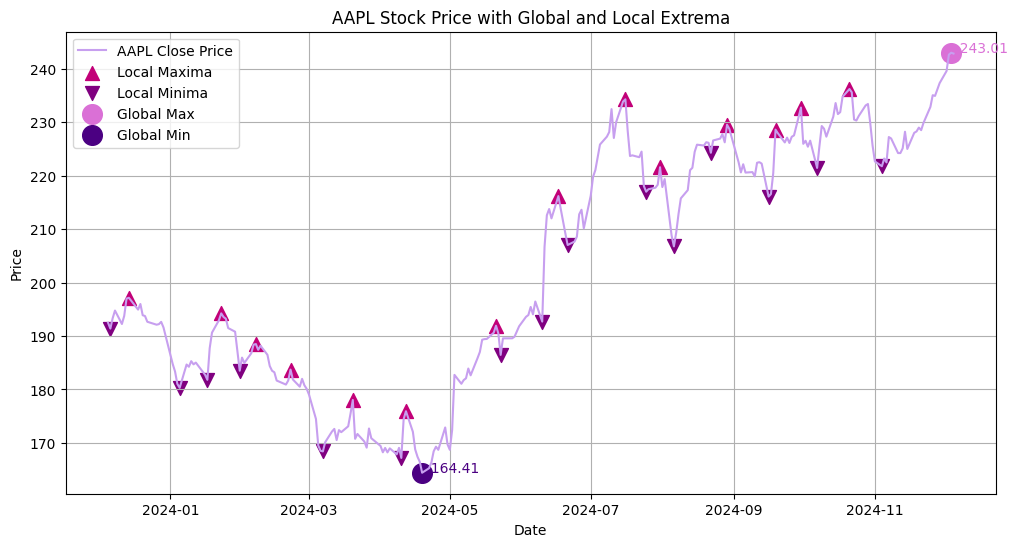


MSFT:
Local Maxima Count: 14
Local Minima Count: 15


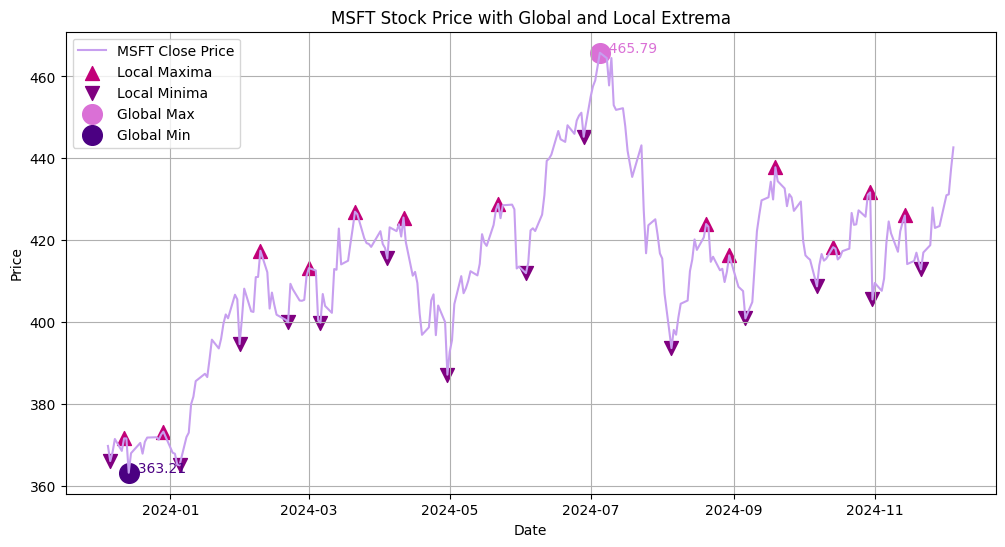


GOOGL:
Local Maxima Count: 16
Local Minima Count: 14


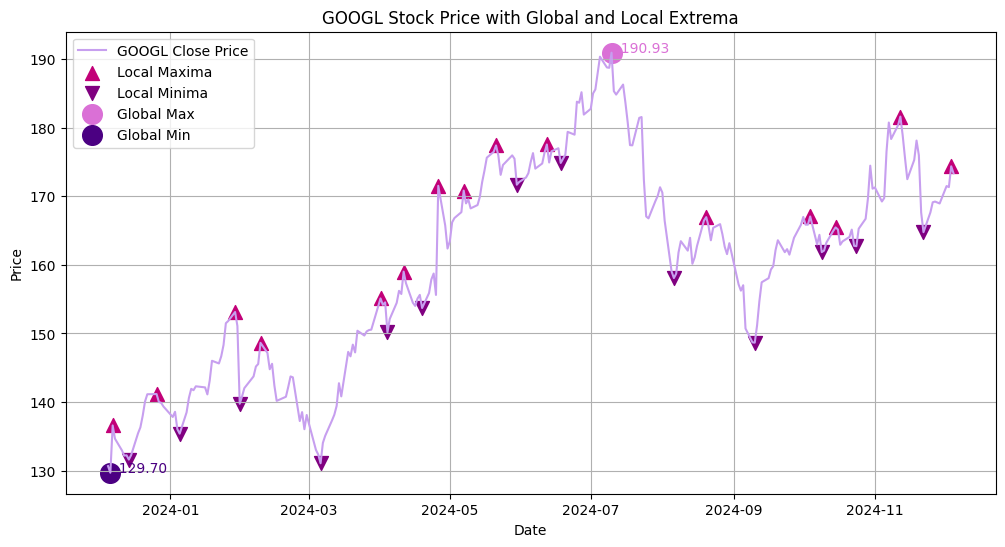


TSLA:
Local Maxima Count: 14
Local Minima Count: 19


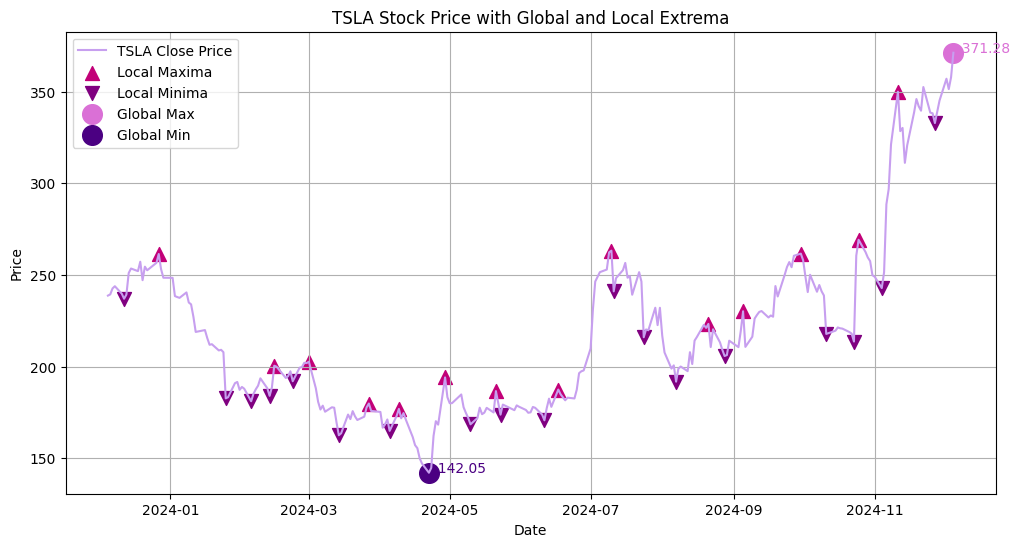


NVDA:
Local Maxima Count: 14
Local Minima Count: 14


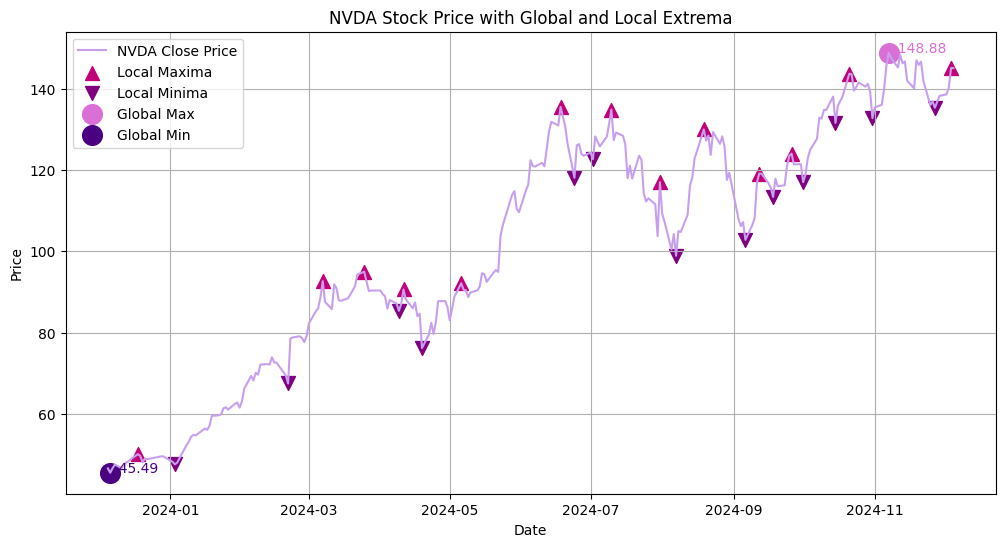


AMD:
Local Maxima Count: 15
Local Minima Count: 18


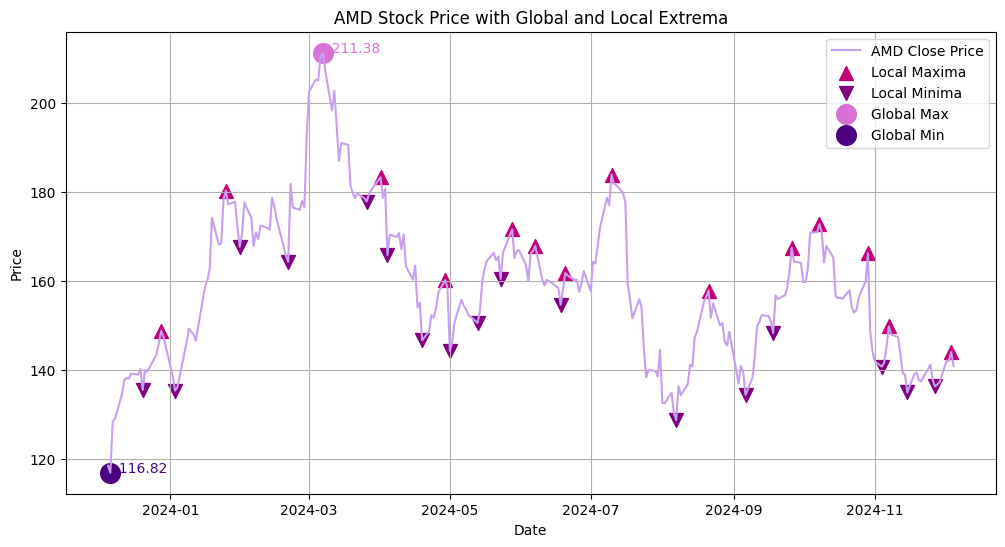


AMZN:
Local Maxima Count: 12
Local Minima Count: 15


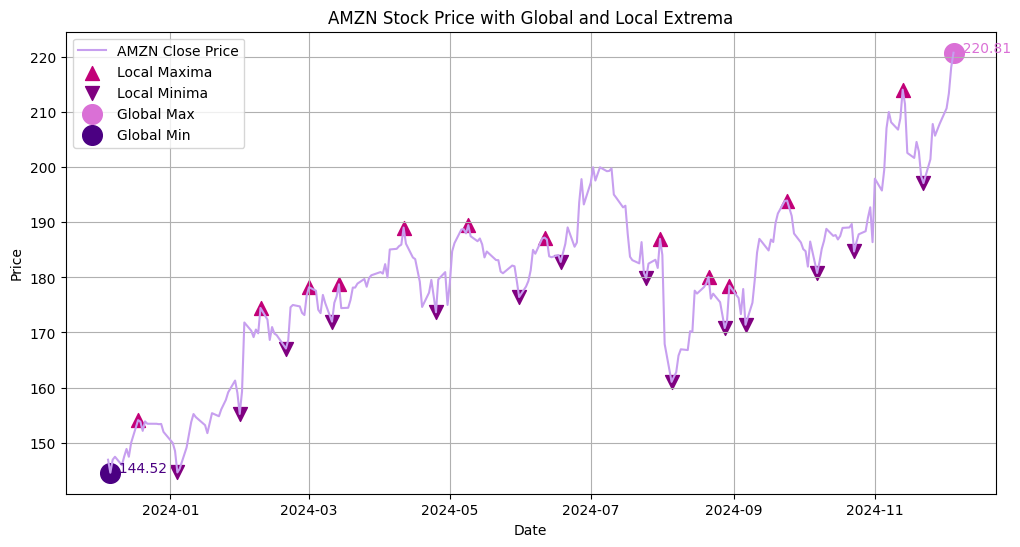


NFLX:
Local Maxima Count: 15
Local Minima Count: 14


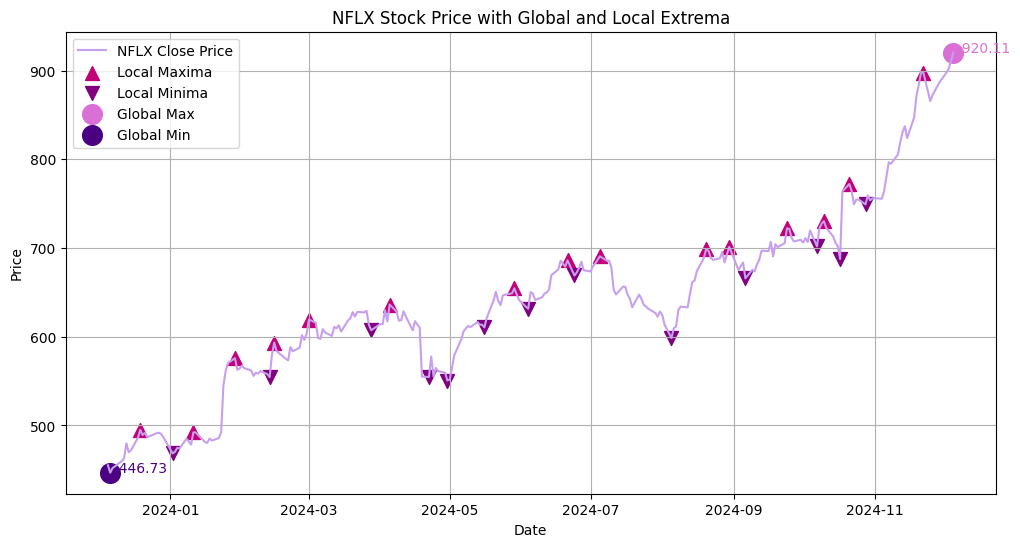


INTC:
Local Maxima Count: 16
Local Minima Count: 16


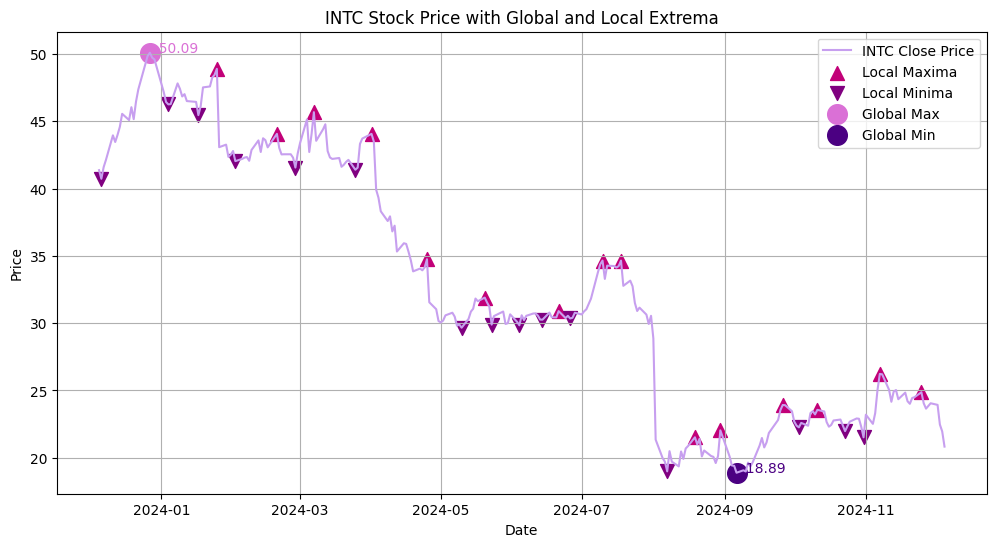


XOM:
Local Maxima Count: 17
Local Minima Count: 16


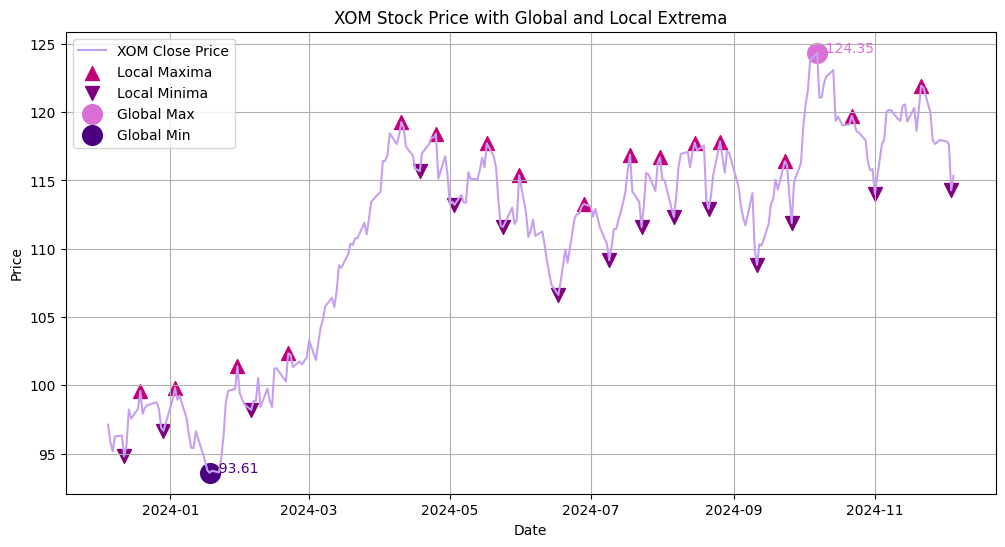


CVX:
Local Maxima Count: 15
Local Minima Count: 16


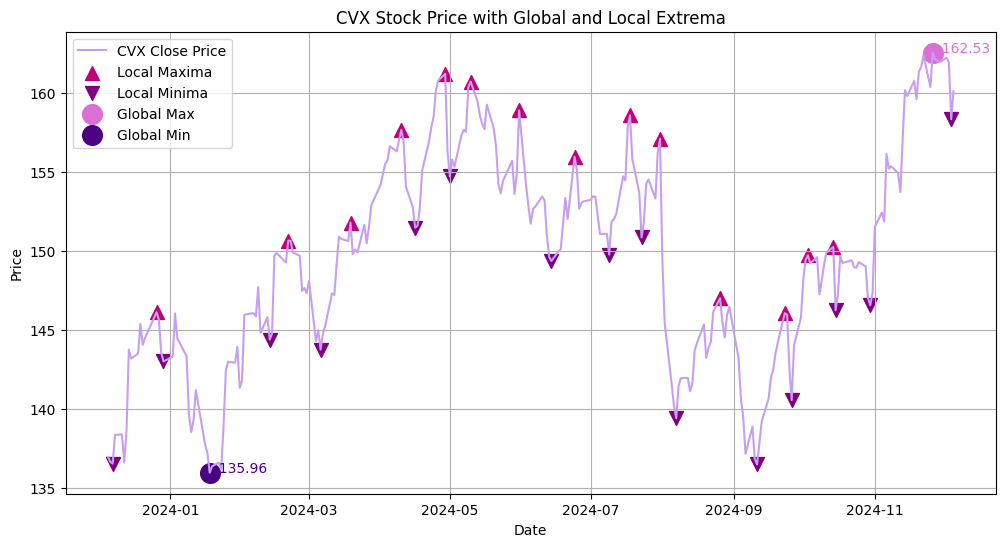


OXY:
Local Maxima Count: 15
Local Minima Count: 16


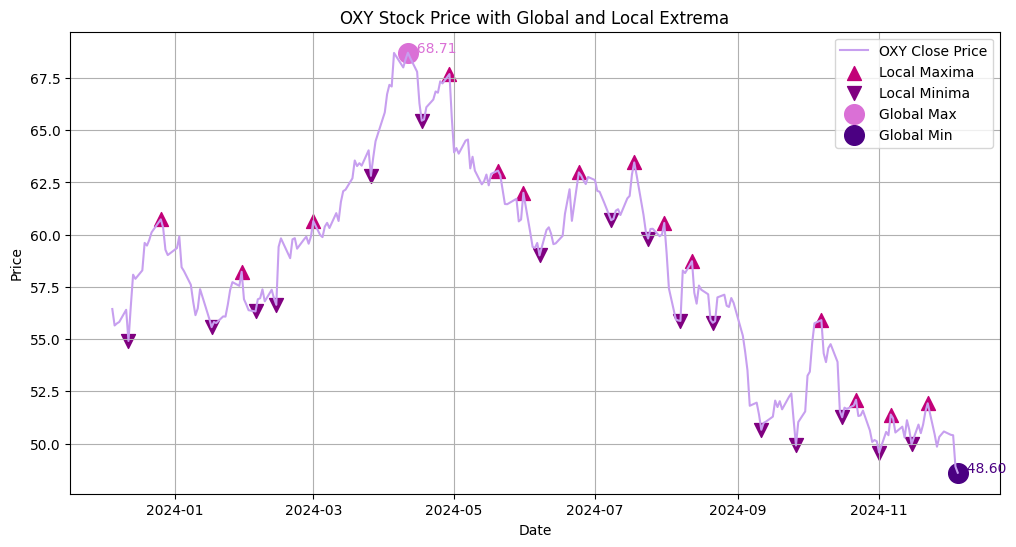


MRNA:
Local Maxima Count: 15
Local Minima Count: 15


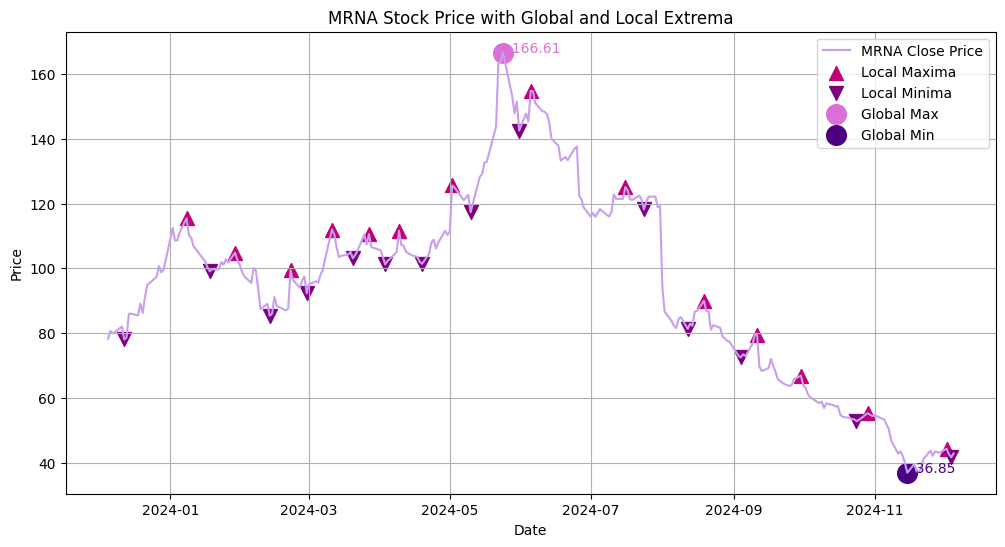


PFE:
Local Maxima Count: 15
Local Minima Count: 13


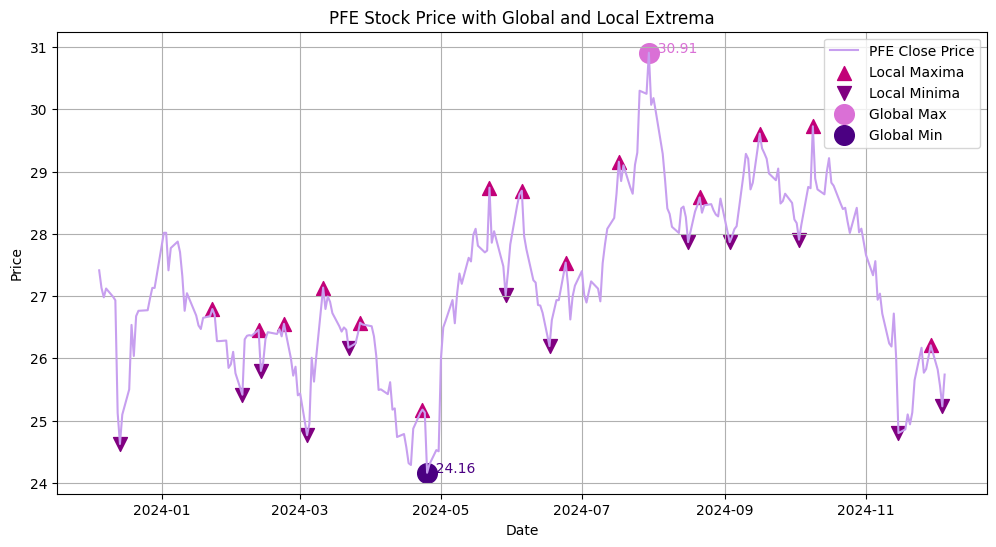


BIIB:
Local Maxima Count: 18
Local Minima Count: 12


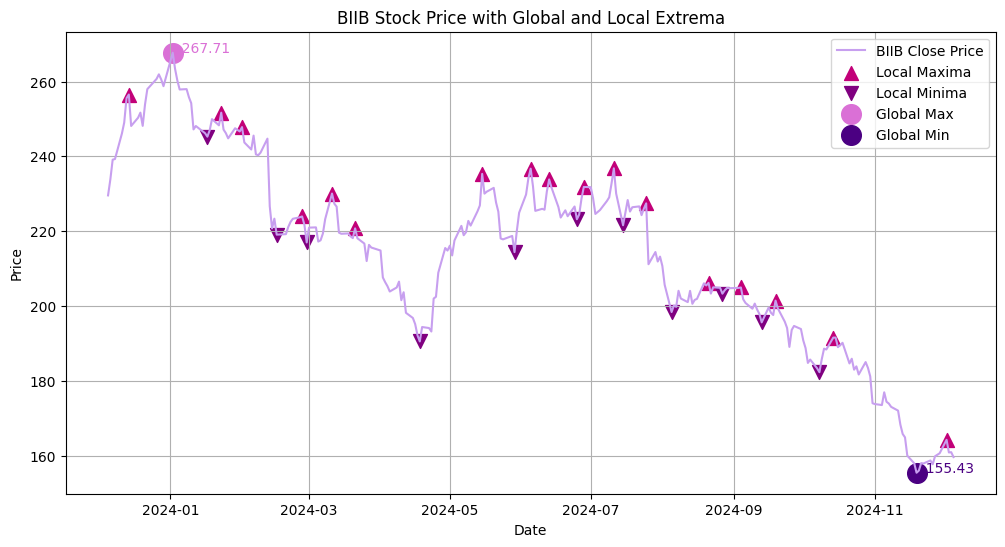


GME:
Local Maxima Count: 14
Local Minima Count: 17


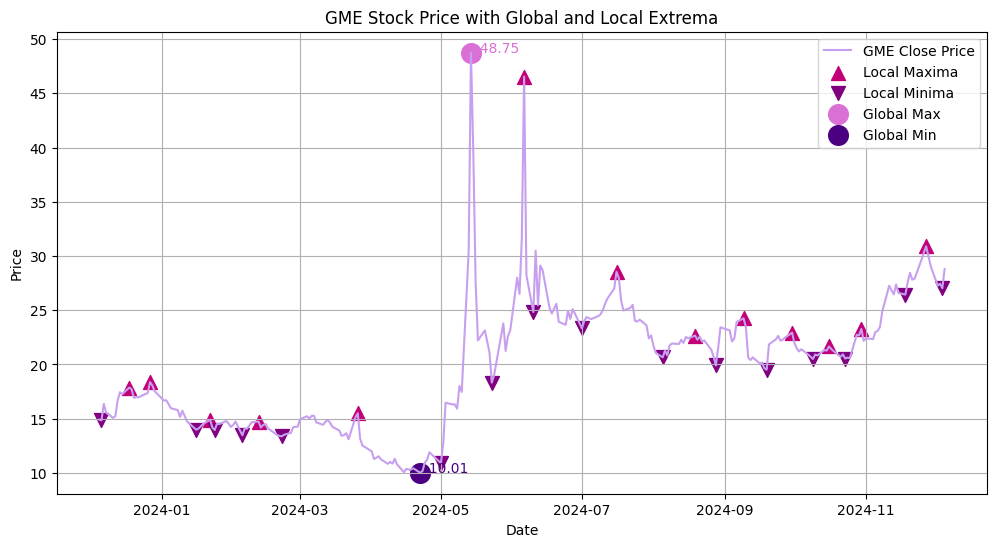


AMC:
Local Maxima Count: 17
Local Minima Count: 15


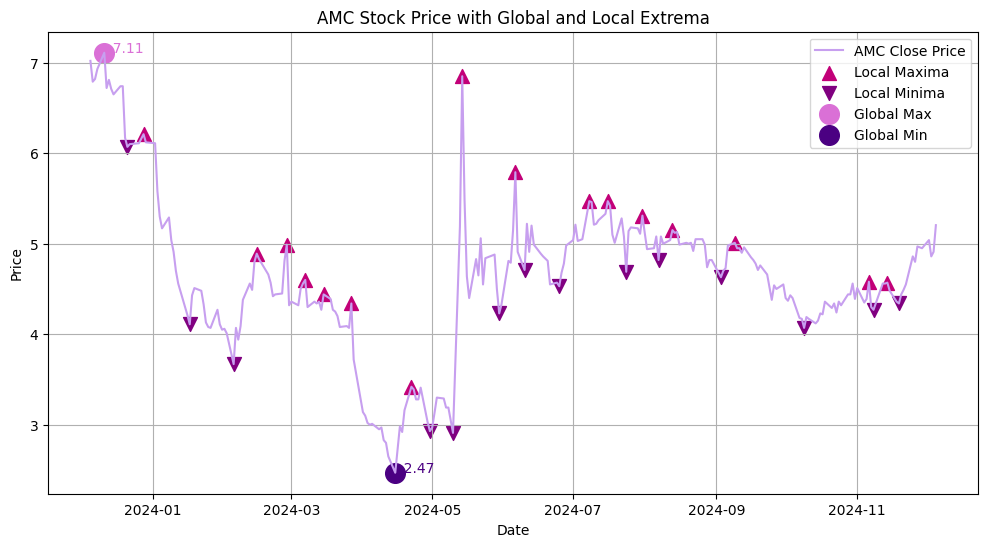


BB:
Local Maxima Count: 16
Local Minima Count: 14


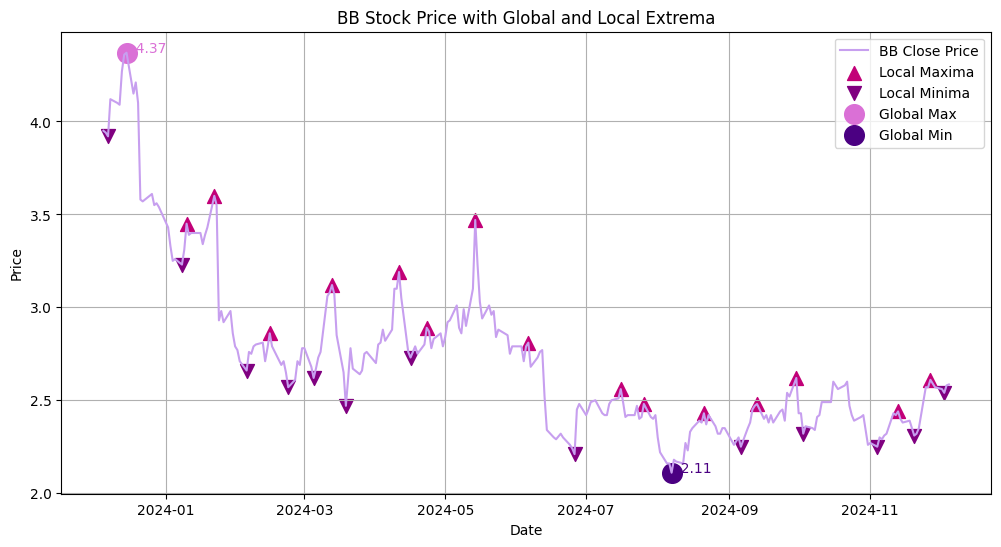


PLUG:
Local Maxima Count: 14
Local Minima Count: 13


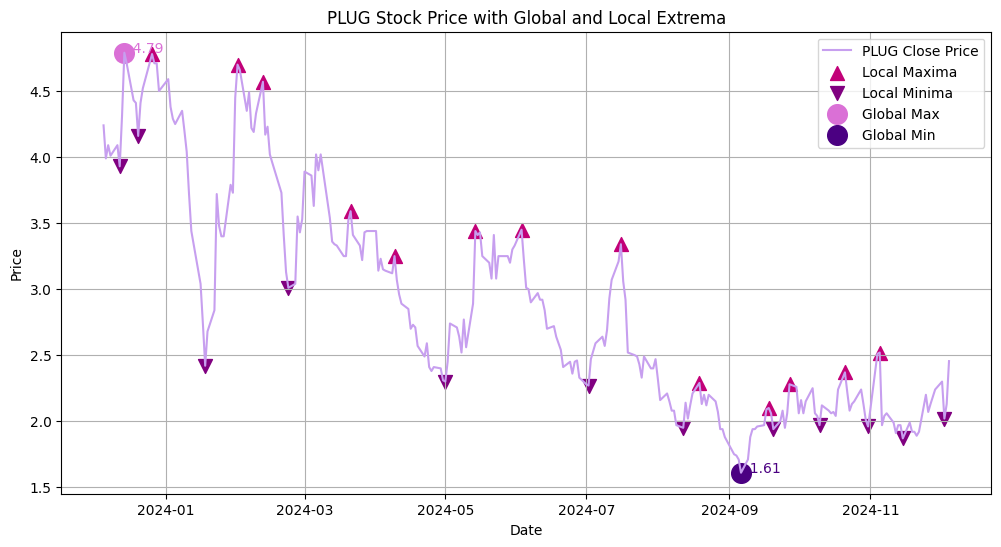


PLTR:
Local Maxima Count: 16
Local Minima Count: 15


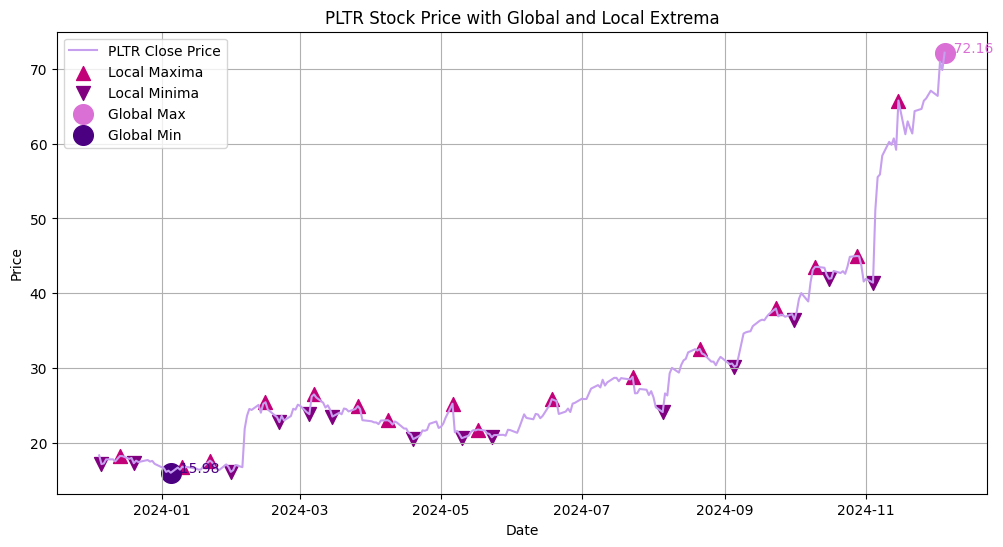


ROKU:
Local Maxima Count: 16
Local Minima Count: 20


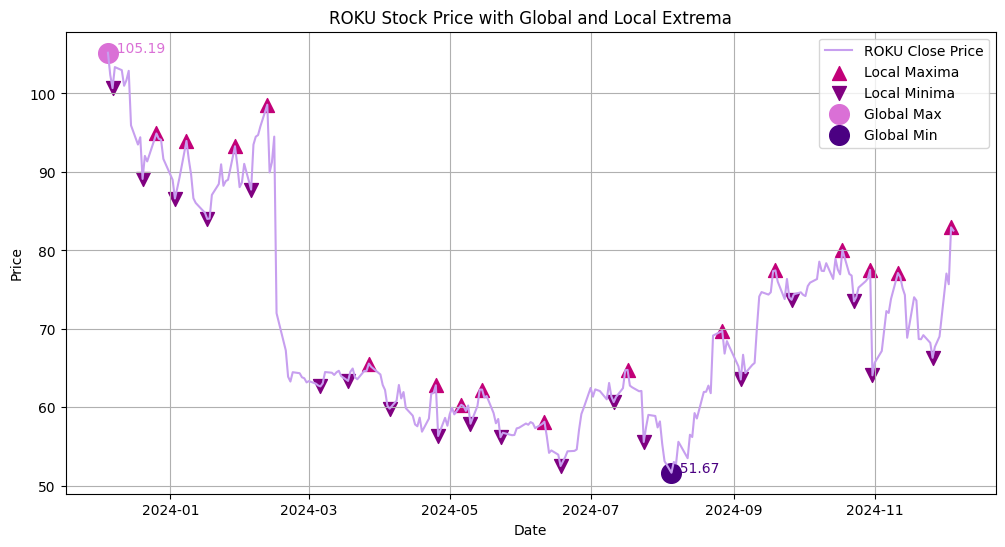


ZM:
Local Maxima Count: 18
Local Minima Count: 18


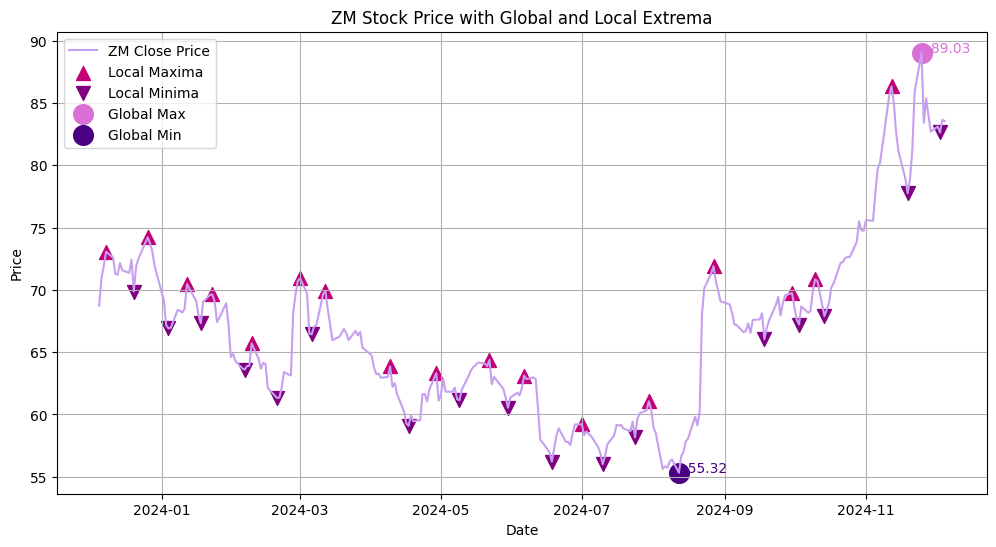


SQ:
Local Maxima Count: 18
Local Minima Count: 17


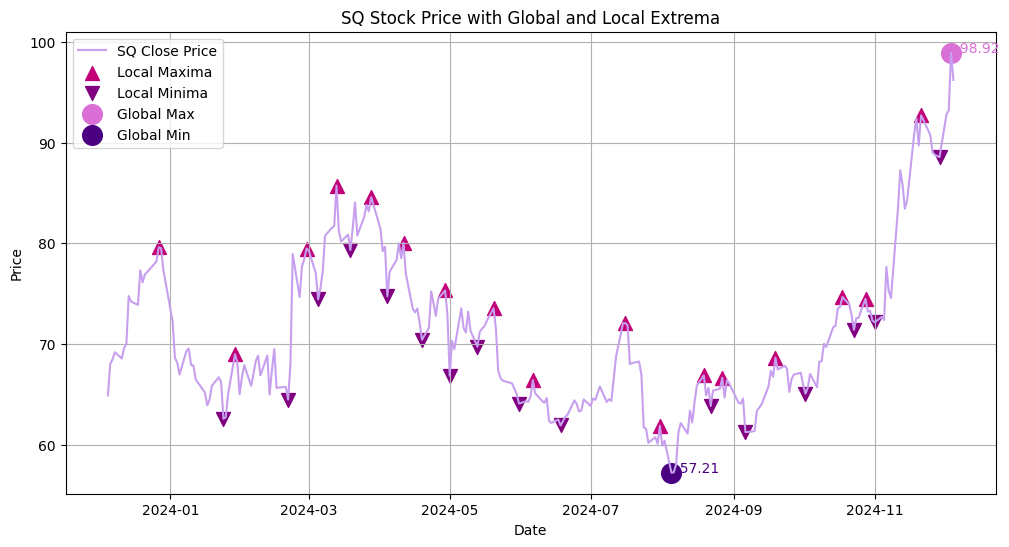


PYPL:
Local Maxima Count: 19
Local Minima Count: 19


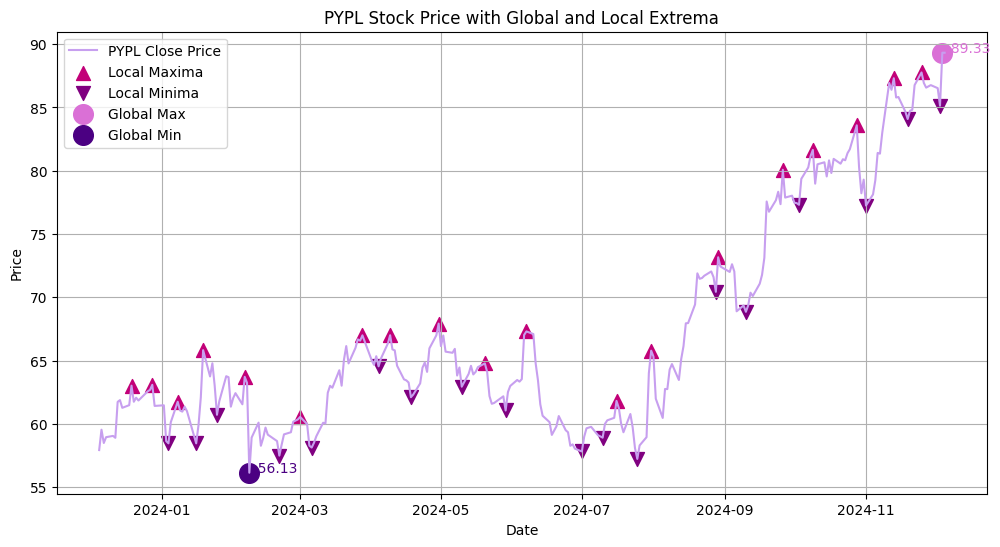


UBER:
Local Maxima Count: 15
Local Minima Count: 11


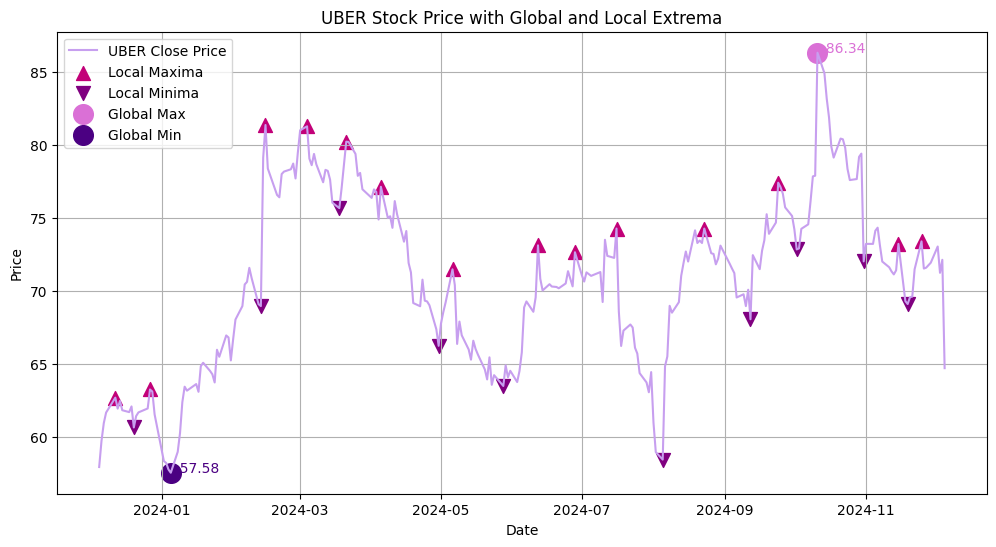


LYFT:
Local Maxima Count: 16
Local Minima Count: 16


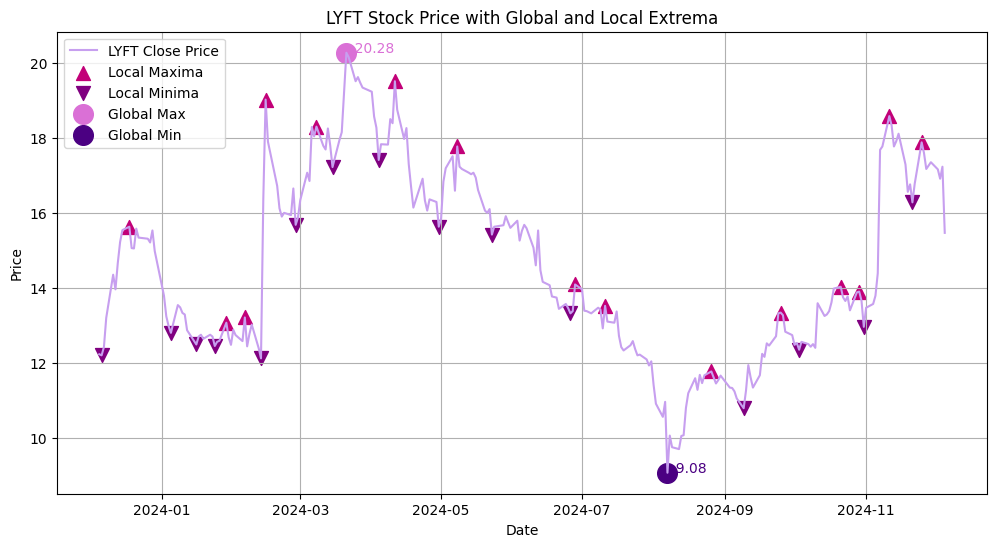


T:
Local Maxima Count: 15
Local Minima Count: 18


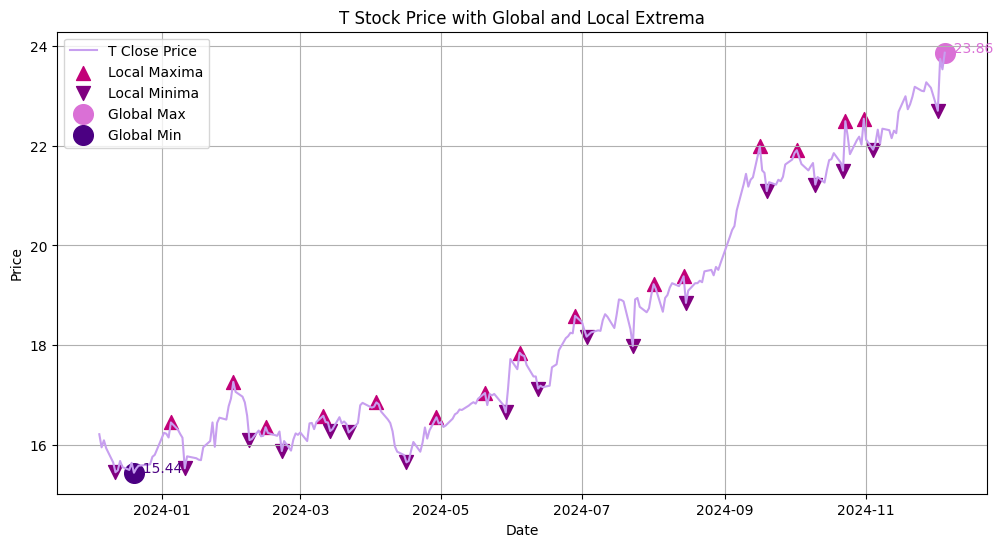


VZ:
Local Maxima Count: 19
Local Minima Count: 17


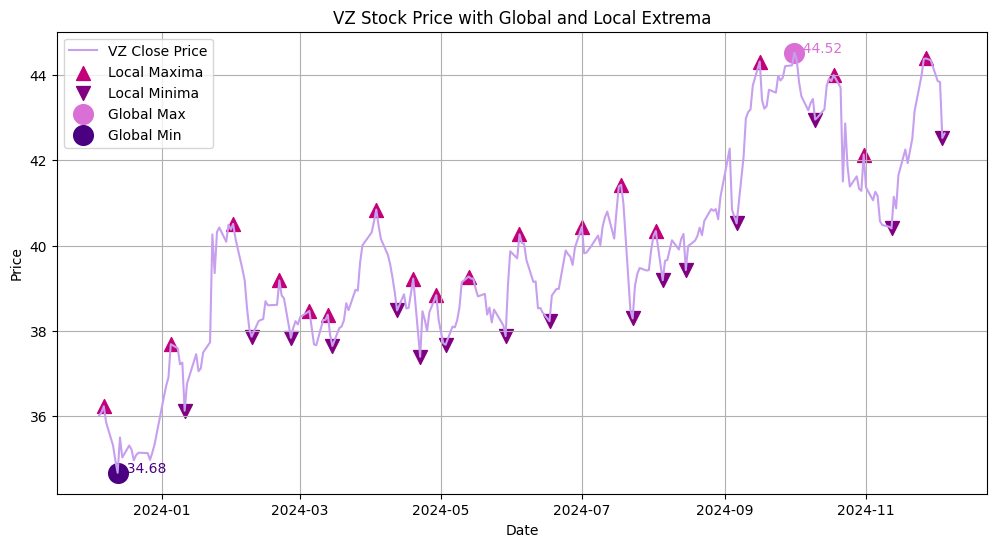


TMUS:
Local Maxima Count: 14
Local Minima Count: 14


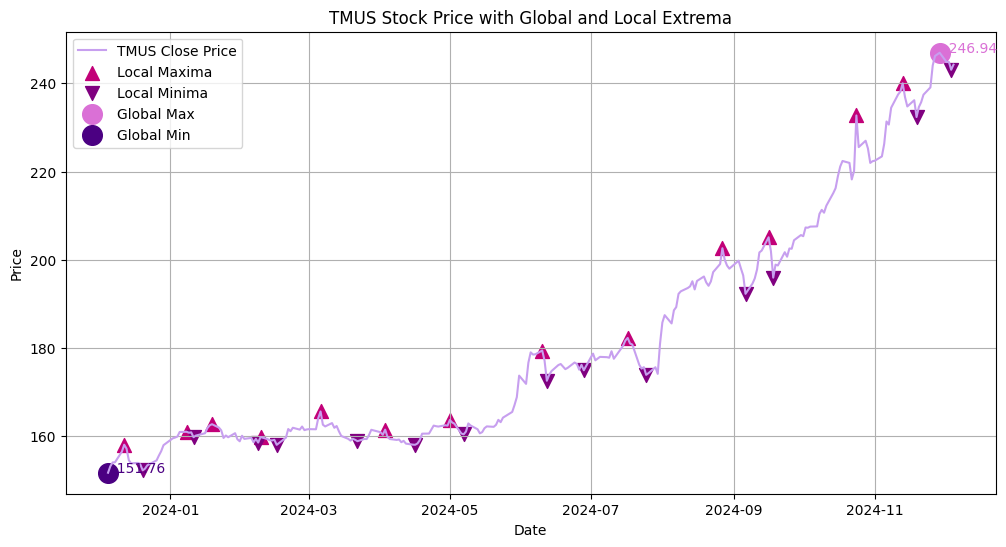


S:
Local Maxima Count: 15
Local Minima Count: 19


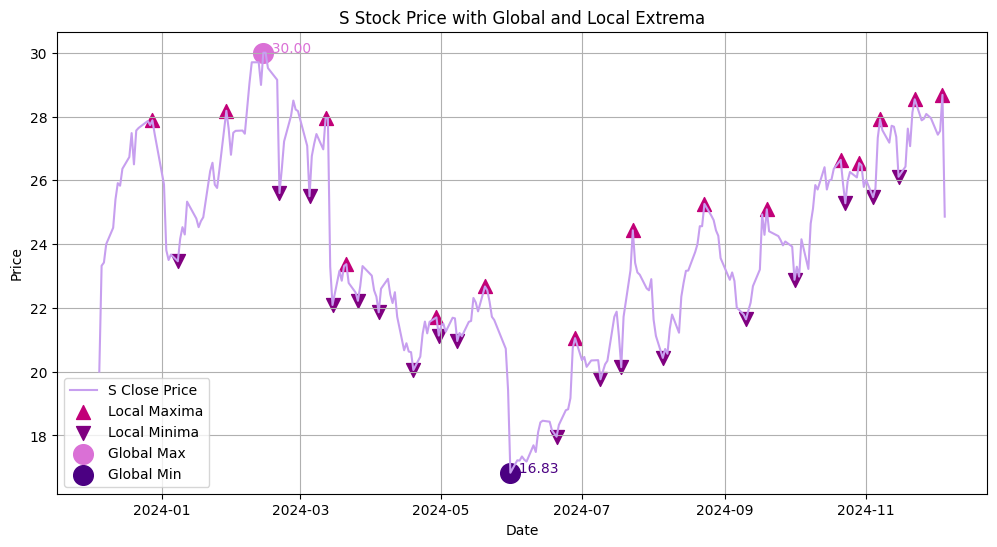


TM:
Local Maxima Count: 14
Local Minima Count: 13


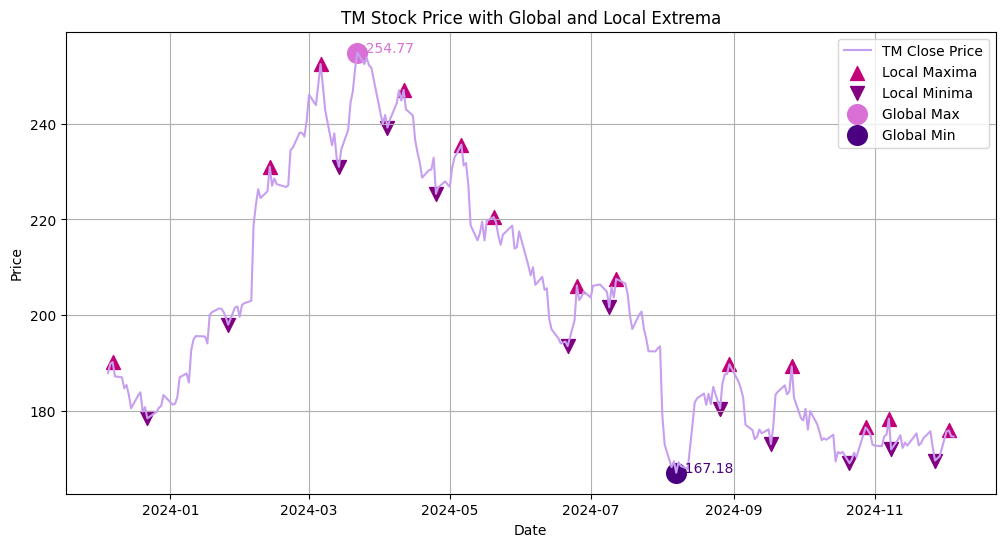


F:
Local Maxima Count: 13
Local Minima Count: 15


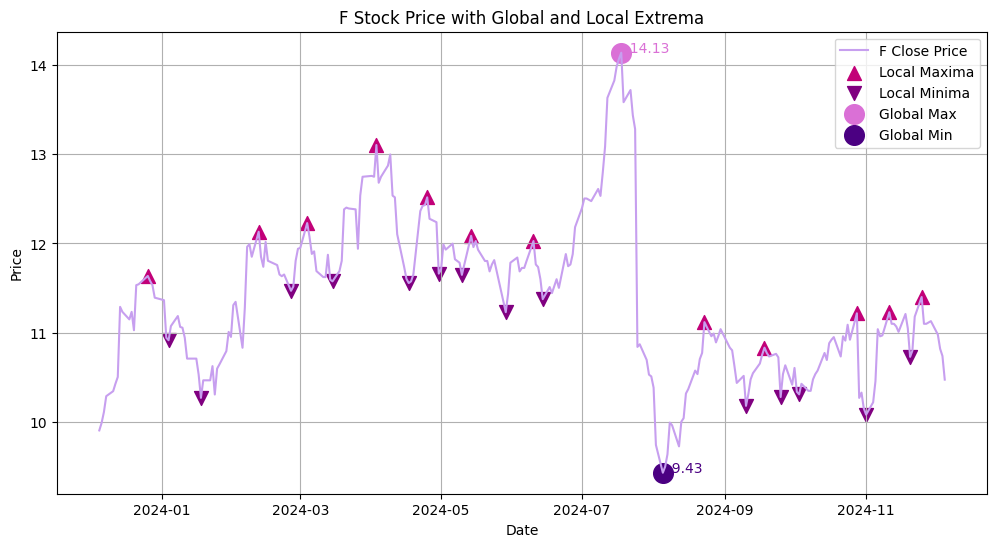


GM:
Local Maxima Count: 16
Local Minima Count: 13


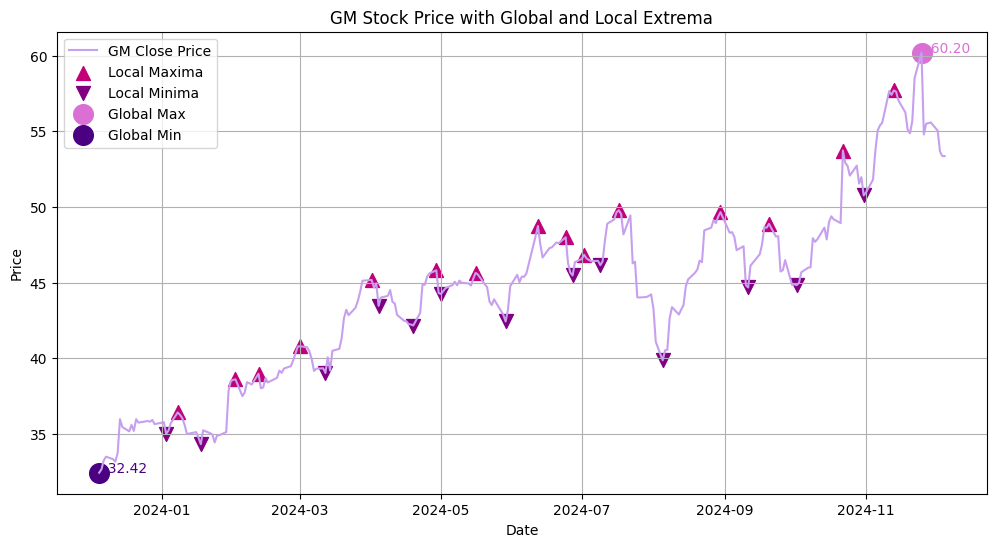


NIO:
Local Maxima Count: 17
Local Minima Count: 16


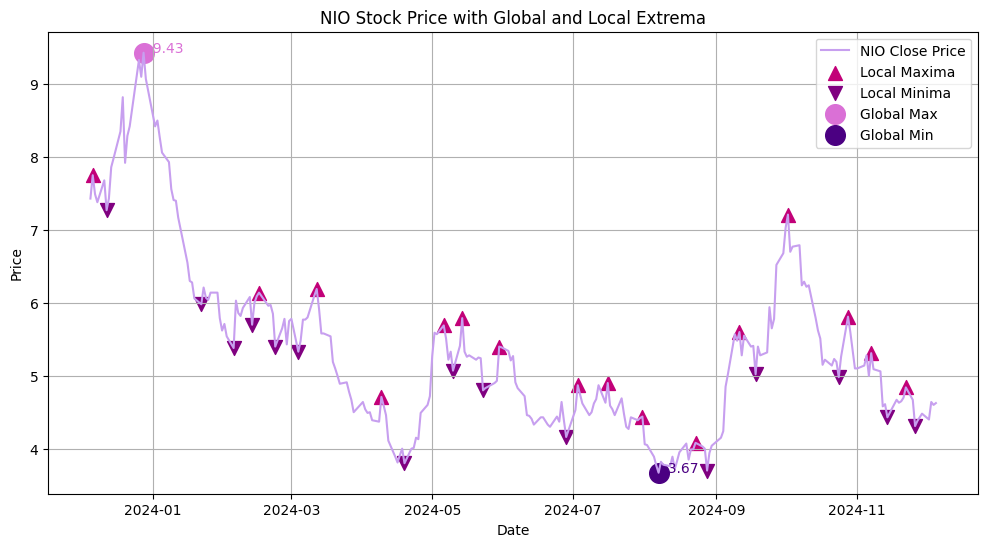


LI:
Local Maxima Count: 15
Local Minima Count: 16


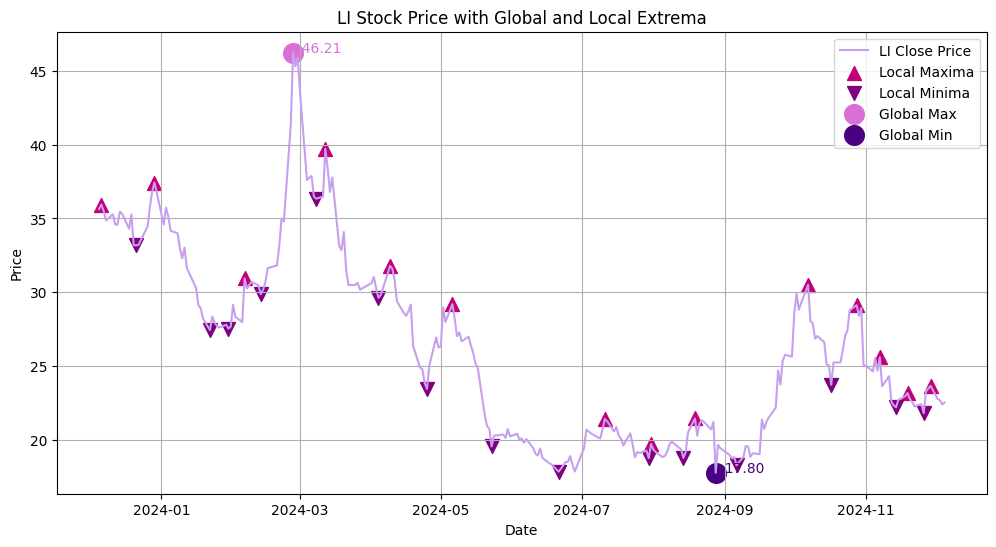


XPEV:
Local Maxima Count: 14
Local Minima Count: 11


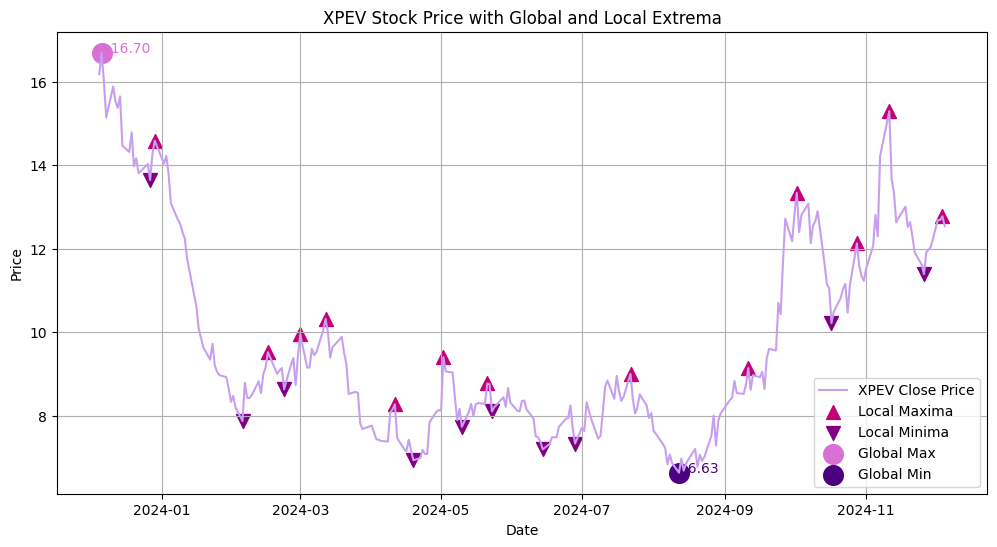


Comparison of Local Extrema and Overall Scores:
       Local Maxima  Local Minima  Overall Score
AAPL             15            16             31
MSFT             14            15             29
GOOGL            16            14             30
TSLA             14            19             33
NVDA             14            14             28
AMD              15            18             33
AMZN             12            15             27
NFLX             15            14             29
INTC             16            16             32
XOM              17            16             33
CVX              15            16             31
OXY              15            16             31
MRNA             15            15             30
PFE              15            13             28
BIIB             18            12             30
GME              14            17             31
AMC              17            15             32
BB               16            14             30
PLUG             14 

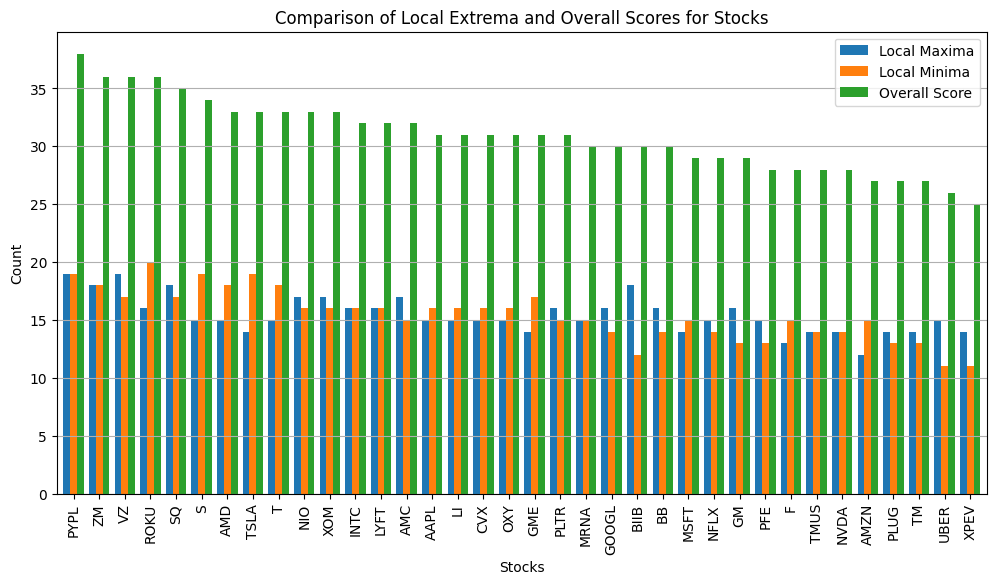

In [37]:
tickers = ['AAPL', 'MSFT', 'GOOGL','TSLA', 'NVDA', 'AMD', 'AMZN', 'NFLX', 'INTC', 'XOM', 'CVX', 'OXY', 'MRNA', 'PFE', 'BIIB', 'GME', 'AMC', 'BB', 'PLUG', 'PLTR', 'ROKU', 'ZM', 'SQ', 'PYPL', 'UBER', 'LYFT', 'T', 'VZ', 'TMUS', 'S', 'TM', 'F', 'GM', 'NIO', 'LI', 'XPEV']
analyze_stocks(tickers, interval='1d', period='1y', order=5)